# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

In [1]:
#Setting up pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
df_airbnb = pd.read_csv('./airbnb_hw.csv', low_memory=False)
var = 'Price'

print(df_airbnb[var].unique(), '\n')
print(df_airbnb[var].value_counts(), '\n')
df_airbnb['var_nan'] = df_airbnb[var].isnull()
print('Total Missing Before Coercion: \n', sum(df_airbnb['var_nan']), '\n')

df_airbnb[var] = df_airbnb[var].str.replace(',', '')
df_airbnb[var] = pd.to_numeric(df_airbnb[var], errors='coerce')

df_airbnb['var_nan'] = df_airbnb[var].isnull()
print('Total Missing: \n', sum(df_airbnb['var_nan']), '\n')

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

In order to clean the Price variable I first viewed the variable data by using unique, value count, and trying to create a histogram. I then cleaned the data by removing the comma separator for values equal to or over 1,000. After that I then coerced the values to a numeric to also help create a better histogram graph. Originally upon viewing the dataset, I noticed that there were not any missing values but I included the missing dummy variable to ensure that any missing values were removed.

In [3]:
df_mn = pd.read_csv('./mn_police_use_of_force.csv', low_memory=False)
var = 'subject_injury'

print(df_mn[var].unique(), '\n')
print(df_mn[var].value_counts(), '\n')

df_mn['var_nan'] = df_mn[var].isnull()
print('Total Missing: \n', sum(df_mn['var_nan']), '\n')
not_missing = sum(df_mn['var_nan'] == False)
proportion_missing = (sum(df_mn['var_nan']) / (not_missing + sum(df_mn['var_nan']))) * 100
print('Proportion Missing: \n', proportion_missing)

pd.crosstab(df_mn['force_type'], df_mn[var])
#pd.crosstab(df_mn['force_type'], df_mn['var_nan'])

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

Total Missing: 
 9848 

Proportion Missing: 
 76.19342359767892


subject_injury,No,Yes
force_type,,
Baton,0,2
Bodily Force,1093,1286
Chemical Irritant,131,41
Firearm,2,0
Gun Point Display,33,44
Improvised Weapon,34,40
Less Lethal Projectile,1,2
Police K9 Bite,2,44
Taser,150,172


In [4]:
df_justice = pd.read_parquet('./justice_data.parquet')
var = 'WhetherDefendantWasReleasedPretrial'

print(df_justice[var].unique(), '\n')
print(df_justice[var].value_counts(), '\n')

df_justice[var] = df_justice[var].replace([9], np.nan)
print(df_justice[var].value_counts())

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64


In [5]:
var = 'SentenceTypeAllChargesAtConvictionInContactEvent'
print(df_justice[var].unique(), '\n')

var ='ImposedSentenceAllChargeInContactEvent'
df_cond = df_justice[ df_justice[var].isin(['9', '0', '1', '4', '2']) ]
df_cond.shape
print(df_cond[var].unique(), '\n')
print(df_cond[var].value_counts(), '\n')


[9 0 1 4 2] 

['0' '4' '2' '9' '1'] 

ImposedSentenceAllChargeInContactEvent
0    4953
2     289
4      94
9      53
1       4
Name: count, dtype: int64 



**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [6]:
df_shark = pd.read_excel('./GSAF5.xls')
print("df_shark.columns:")
print(df_shark.columns)

df_shark = df_shark.drop(columns=['pdf', 'href formula', 'href', 'Case Number.1', 'original order', 'Unnamed: 22'])

var = 'Year'
print(df_shark[var].unique(), '\n')
print("Attacks Over All Time: \n")
#print(df_shark[var].value_counts(), '\n')
print(df_shark[var].describe(), '\n')

print("Attacks 1940 and After: \n")
#print(df_shark[var].value_counts())
df_shark = df_shark[df_shark[var] >= 1940]
print(df_shark[var].describe())


df_shark.columns:
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1

[nan 63.  9. 39. 19.  7. 85. 69. 18. 66. 21. 40. 37. 16. 20. 12. 42. 26.
 14. 45. 30. 56. 29. 35. 58. 24. 55. 17. 36. 23. 28. 48. 57. 61. 27. 38.
 68. 33. 15. 41. 43. 49. 25. 46. 65. 64. 13. 11. 32. 10. 62. 22. 52. 44.
 47. 59.  8. 50. 34. 77. 60. 73. 67.  6. 53. 51. 31. 71. 54. 75. 70.  4.
 74.  3. 82. 72.  5. 86. 84. 87.  1. 81. 78.] 



<Axes: >

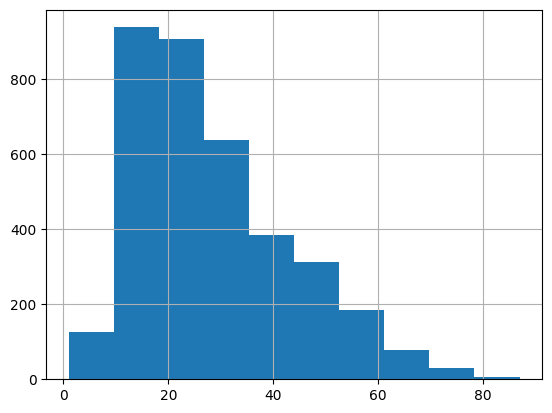

In [7]:
var = "Age"
#print(df_shark[var].unique(), '\n')
df_shark[var] = pd.to_numeric(df_shark[var], errors='coerce')
df_shark['age_nan'] = df_shark[var].isnull()
print(df_shark[var].unique(), '\n')
df_shark[var].hist()

In [8]:
var = "Sex"
#print(df_shark[var].unique(), '\n')
df_shark[var] = df_shark[var].str.replace(' ', '')
df_shark[var] = df_shark[var].str.replace('m', 'M')
df_shark[var] = df_shark[var].str.replace('Mx2', 'M')
df_shark[var] = df_shark[var].replace('lli', np.nan)
#print(df_shark[var].unique(), '\n')
#print(df_shark[var].value_counts(), '\n')
male = df_shark[var].value_counts('M')
print('The proportion of victims that are each sex are: \n', male)

The proportion of victims that are each sex are: 
 Sex
M    0.857539
F    0.142461
Name: proportion, dtype: float64


In [9]:
var = "Type"
df_shark[var] = df_shark[var].str.replace(' ', '')
df_shark[var] = df_shark[var].str.replace('Questionable', 'Unknown')
df_shark[var] = df_shark[var].str.replace('unprovoked', 'Unprovoked')
df_shark[var] = df_shark[var].str.replace('Watercraft', 'Unknown')
df_shark[var] = df_shark[var].str.replace('SeaDisaster', 'Unknown')
df_shark[var] = df_shark[var].str.replace('Unconfirmed', 'Unknown')
df_shark[var] = df_shark[var].str.replace('Unverified', 'Unknown')
df_shark[var] = df_shark[var].str.replace('Invalid', 'Unknown')
df_shark[var] = df_shark[var].str.replace('Underinvestigation', 'Unknown')
df_shark[var] = df_shark[var].str.replace('Boat', 'Unknown')
df_shark[var] = df_shark[var].str.replace('?', 'Unknown')
df_shark[var] = df_shark[var].fillna('Unknown')

print(df_shark[var].unique(), '\n')
print(df_shark[var].value_counts(), '\n')

unprovoked = df_shark[var].value_counts('Unprovoked')
print('The proportion of attacks that are each type are: \n', unprovoked)

['Provoked' 'Unprovoked' 'Unknown'] 

Type
Unprovoked    4098
Unknown        889
Provoked       520
Name: count, dtype: int64 

The proportion of attacks that are each type are: 
 Type
Unprovoked    0.744144
Unknown       0.161431
Provoked      0.094425
Name: proportion, dtype: float64


In [10]:
var = 'Fatal Y/N'
df_shark[var] = df_shark[var].str.replace(' ', '')
df_shark[var] = df_shark[var].str.replace('n', 'N')
df_shark[var] = df_shark[var].str.replace('2017', 'Unknown')
df_shark[var] = df_shark[var].str.replace('F', 'Unknown')
df_shark[var] = df_shark[var].str.replace('M', 'Unknown')
df_shark[var] = df_shark[var].str.replace('Nq', 'N')
df_shark[var] = df_shark[var].str.replace('Yx2', 'Y')
df_shark[var] = df_shark[var].str.replace('UNKNOWN', 'Unknown')
df_shark[var] = df_shark[var].fillna('Unknown')
print(df_shark[var].unique(), '\n')
print(df_shark[var].value_counts(), '\n')

['N' 'Y' 'Unknown'] 

Fatal Y/N
N          4222
Y           825
Unknown     460
Name: count, dtype: int64 



In [11]:
pd.crosstab(df_shark['Type'], df_shark['Sex'])

Sex,F,M
Type,,
Provoked,28,448
Unknown,79,543
Unprovoked,613,3343


In [12]:
pd.crosstab(df_shark['Type'], df_shark['Fatal Y/N'])

Fatal Y/N,N,Unknown,Y
Type,,,
Provoked,498,9,13
Unknown,366,399,124
Unprovoked,3358,52,688


In [13]:
pd.crosstab(df_shark['Sex'], df_shark['Fatal Y/N'])

Fatal Y/N,N,Unknown,Y
Sex,,,
F,573,58,89
M,3351,323,660


In [14]:
var = 'Species '
print(df_shark[var].unique(), '\n')
print(df_shark[var].value_counts(), '\n')


['Lemon shark 1.8 m (6ft)' '5m (16.5ft) Great White' 'Undetermined' ...
 'White shark, species identity confirmed by tooth pattern'
 'White shark, 160-kg [353-lb], identity confirmed by tooth pattern'
 ' White shark'] 

Species 
White shark                                           180
Shark involvement prior to death was not confirmed     98
Shark involvement not confirmed                        86
Invalid                                                78
Tiger shark                                            75
                                                     ... 
Great White Shark est 3m (10ft)                         1
Suspected Great White                                   1
5m (16.5ft) Great White                                 1
Lemon shark 1.8 m (6ft)                                 1
 White shark                                            1
Name: count, Length: 1567, dtype: int64 

